## Name: Vishal Padma
## ID: 19200174
## Project: Data Science with Python
## API: Covid 19

In [441]:
import os
import urllib.request
import csv
import pandas as pd 
import requests
import json
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib
import matplotlib.pyplot as plt
# important! Need to tell IPython to display plots within the notebook
%matplotlib inline

# Analysis on Covid 19 API

I have taken api which return cornfirmed recovered and Deaths cases per country along with multiple other data for a given day in the enrire world. the link to the API is mentioned in the cell below. This data has a lot missing values and the many columns are not even needed. 

# Data Collection

In [16]:
#The belwo mentioned fucntion is used to generate the Date Range form specified Date to current day minus 1.
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2020, 2, 1)
end_date = date.today()
Data_collection = pd.DataFrame() #Created a new dataframe in which the data will be collected.
for single_date in daterange(start_date, end_date):#for loop to collect all the data from different dates and append everything into the same dataframe.
    A = single_date.strftime("%Y-%m-%d")
    df = pd.read_json("https://covid19.mathdro.id/api/daily/%s"%A)
    Data_collection = Data_collection.append(df, ignore_index=True)
    Data_collection.to_csv("Raw_Data.csv",index=False)#Saved the dataframe into a csv

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, 

        active admin2           combinedKey  confirmed         countryRegion  \
0          NaN    NaN                   NaN       7153        Mainland China   
1          NaN    NaN                   NaN        599        Mainland China   
2          NaN    NaN                   NaN        535        Mainland China   
3          NaN    NaN                   NaN        422        Mainland China   
4          NaN    NaN                   NaN        389        Mainland China   
5          NaN    NaN                   NaN        297        Mainland China   
6          NaN    NaN                   NaN        286        Mainland China   
7          NaN    NaN                   NaN        247        Mainland China   
8          NaN    NaN                   NaN        207        Mainland China   
9          NaN    NaN                   NaN        206        Mainland China   
10         NaN    NaN                   NaN        202        Mainland China   
11         NaN    NaN                   

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Data Cleaning

In [348]:
#Read the csv Data into a Dataframe and dropped the below mentioned columns as they were filled with missing value and were of no use to do data analysis.
Raw_Data = pd.read_csv("Raw_Data.csv")
Raw_Data= Raw_Data.drop(['active', 'admin2', 'combinedKey','fips','lat', 'latitude', 'long','longitude', 'provinceState','\ufefffips','\ufeffprovinceState'],axis=1)

In [349]:
#Below fucntion is to strip the dates in the lastupdate column where they have time associated with each date and updating the same in the dataframe
def Strip_Date(df):
    List_time=list(df['lastUpdate'])
    List_time1=[]
    for i in range(len(List_time)):
        X=(List_time[i])
        if "T" in X:
            head, sep, tail = X.partition('T')# In some date types there is 'T' before the time is mentioned
            List_time1.append(head)
        elif " " in X:
            head, sep, tail = X.partition(' ')# In some date types there is a space before the time is mentioned
            List_time1.append(head)
    df['lastUpdate']=List_time1
    
    return df

In [350]:
Raw_Data = Strip_Date(Raw_Data)

In [351]:
#This function is to get all the date format to a same standard so that there is no issue later while processing.
#Here i have selected each date and transformed the '/' into a hyhen and later on added a zero to month to be consistent with the dates.
def Change_Date_Format(df):
    List_time_2 = list(df['lastUpdate'])
    for i in range(len(List_time_2)):
        B = List_time_2[i]
        if "/" in B:
            B = B.replace("/","")
            if (len(B)==7):
                M = B[0:1]
                D = B[1:3]
                Y = B[3:7]
                List_time_2[i] = (Y+'-0'+M+'-'+D)
            elif (len(B)==6):
                B = B.replace("/","")
                M = B[0:1]
                D = B[1:2]
                Y = B[2:6]
                List_time_2[i] = (Y+'-0'+M+'-'+D)
            elif (len(B)==5):
                B = B.replace("20","2020")
                M = B[0:1]
                D = B[1:3]
                Y = B[3:7]
                List_time_2[i] = (Y+'-'+M+'-'+D)
            elif (len(B)==4):
                B = B.replace("20","2020")
                M = B[0:1]
                D = B[1:2]
                Y = B[2:6]
                List_time_2[i] = (Y+'-0'+M+'-0'+D)
                
    for i in range(len(List_time_2)):
        F = List_time_2[i]
        if "-3-" in F:
            List_time_2[i] = F.replace("-3-","-03-")
        elif "-2-" in F:
            List_time_2[i] = F.replace("-2-","-02-")
        elif(F=='2020-02-1'):
            List_time_2[i] = F.replace("2020-02-1","2020-02-01")
    
    df['lastUpdate'] = List_time_2
    
    return df

In [352]:
Raw_Data = Change_Date_Format(Raw_Data)

In [353]:
#Sorting the dataset accroidng to the country region where later on i will create a data dictionary to store data for each country seperately
Raw_Data.sort_values(['countryRegion'], ascending=True,inplace=True)

In [354]:
#this section i am creating a new dictionary where i have stored data for each country as a value and key is the country name.
Countries_list = Raw_Data['countryRegion'].unique()#To get the list of all unique countries
# Dates_list = Raw_Data['lastUpdate'].unique()
Dictionary_of_Data={X: pd.DataFrame() for X in Countries_list}
List_of_Keys =list(Dictionary_of_Data.keys())
#creating a dictionary
for i in range(len(Countries_list)):
    country = Countries_list[i]
    Dictionary_of_Data[List_of_Keys[i]] = Raw_Data[Raw_Data['countryRegion'] == country]

In [355]:
Dates_list1 = (Raw_Data['lastUpdate'].unique())#To get the list of all unique Dates
Dates_list1.sort()#And sorting the same
Country = Countries_list
#Creating three new dataframes which will have the rows and different states and columns as all the unique dates
Confirmed_Data = pd.DataFrame(index=Country,columns=(Dates_list1))#Used the country as index in each of the dataframe and columns as Dates
Recovered_Data = pd.DataFrame(index=Country,columns=(Dates_list1))
Deaths_Data = pd.DataFrame(index=Country,columns=(Dates_list1))

In [356]:
#In this section i have mapped and converted the data into the format defined in the abobve dataframe.
B = Confirmed_Data.shape[1] #saving the column lenght
C = Confirmed_Data.shape[0] #saving the row lenght
for j in range(C):
    Dataframe1 = pd.DataFrame()
    X1 = (Dictionary_of_Data[List_of_Keys[j]])
    X2 = X1.groupby(['lastUpdate']).sum()
    Dataframe1 = Dataframe1.append(X2)
    Dataframe_T = Dataframe1.T
    R = Dataframe_T.shape[1]
    for i in range(R):
        Ao = Dataframe_T.columns[i]
        for k in range(B):
            Ai = (Confirmed_Data.columns[k])
            if (Ai == Ao):
                S = Dataframe_T.loc["confirmed"][Ai]
                Confirmed_Data[Ai][List_of_Keys[j]] = S
                T = Dataframe_T.loc["recovered"][Ai]
                Recovered_Data[Ai][List_of_Keys[j]] = T
                Y = Dataframe_T.loc["deaths"][Ai]
                Deaths_Data[Ai][List_of_Keys[j]] = Y
            else:
                continue
                
#These above for loops are used to match the data for each country and the same is copied when matched itno the Confirmed, recovered and deaths data.


In [357]:
Confirmed_Data.fillna(0, inplace=True)#Reaplaced all the nan values with zero
Confirmed_Data.to_csv("Confirmed_Data.csv")#Saved the csv to inspect the data

Recovered_Data.fillna(0, inplace=True)#Reaplaced all the nan values with zero
Recovered_Data.to_csv("Recovered_Data.csv")#Saved the csv to inspect the data

Deaths_Data.fillna(0, inplace=True)#Reaplaced all the nan values with zero
Deaths_Data.to_csv("Deaths_Data.csv")#Saved the csv to inspect the data

In [359]:
#This section is used to collect all the country names which are potential matches which each other. There were multiple entries for the same country.
Conf_data = pd.DataFrame(Confirmed_Data)
list_Index = list(Confirmed_Data.index)
list_Index
list_names = list()
for i in range(len(list_Index)-1):
    for j in range(i+1, len(list_Index)):
        H = list_Index[i]
        N = list_Index[j]
        if (H[0:4] == N[0:4] and H not in list_names and N not in list_names):
            list_names.append(H)
            list_names.append(N)
        else:
            continue

In [360]:
#Below fucntion is to select rows in the dataframe which have the same country name and normalize them together for better analysis.
def Clean_states(df, list_names):
    if len(list_names) == 3:
        i=0
        P = list(df.loc[list_names[i]])
        J = list(df.loc[list_names[i+1]])
        O = list(df.loc[list_names[i+2]])
        Z =[x + y + z for x, y, z in zip(P,J,O)]
        df.loc[list_names[i]] = Z
        df.drop(list_names[i+1], inplace=True)
        df.drop(list_names[i+2], inplace=True)
    else:
        i=0
        P = list(df.loc[list_names[i]])
        J = list(df.loc[list_names[i+1]])
        Z =[x + y for x, y in zip(P,J)]
        df.loc[list_names[i]] = Z
        df.drop(list_names[i+1], inplace=True)
            
    return df

In [361]:
#In this section i made a dictionary which contains list with different country names and recreated the copies of new dataframe to replace normalized country in the same dataframe
Confirmed_Data_with_Clean_States = pd.DataFrame(Confirmed_Data)
Recovered_Data_with_Clean_States = pd.DataFrame(Recovered_Data)
Deaths_Data_with_Clean_States = pd.DataFrame(Deaths_Data)

List_i = {'list1':["Bahamas", "Bahamas, The", "The Bahamas"],
          'list2':["Gambia", "Gambia, The", "The Gambia"],
          'list3':["Dominican Republic","Dominica"],
          'list4':["Czech Republic","Czechia"],
          'list5':["Hong Kong","Hong Kong SAR"],
          'list6':["Iran","Iran (Islamic Republic of)"],
          'list7':["Macau","Macao SAR"],
          'list8':["Russia","Russian Federation"],
          'list9':["Taiwan","Taiwan*"],
          'list10':["Vietnam","Viet Nam"],
          'list11':["China","Mainland China"],
          'list12':["South Korea","Korea, South","Republic of Korea"]}

keys = List_i.keys()
for i in keys:
    Confirmed_Data_with_Clean_States = (Clean_states(Confirmed_Data_with_Clean_States,List_i[i]))
    Confirmed_Data_with_Clean_States.to_csv("Confirmed_Data_with_Clean_States.csv")
    
    Recovered_Data_with_Clean_States = (Clean_states(Recovered_Data_with_Clean_States,List_i[i]))
    Recovered_Data_with_Clean_States.to_csv("Confirmed_Data_with_Clean_States.csv")
    
    Deaths_Data_with_Clean_States = (Clean_states(Deaths_Data_with_Clean_States,List_i[i]))
    Deaths_Data_with_Clean_States.to_csv("Deaths_Data_with_Clean_States.csv")

## Data Analysis

In [439]:
#Comnbining results from the above created dataframes so that i can plot.

Uni_Country = list(Confirmed_Data_with_Clean_States.index)
print(len(Uni_Country))
Final_Data =pd.DataFrame(index=Uni_Country)
Final_Data['Confirmed'] = Confirmed_Data_with_Clean_States.iloc[:,-1]
Final_Data['Recovered'] = Recovered_Data_with_Clean_States.iloc[:,-1]
Final_Data['Deaths'] = Deaths_Data_with_Clean_States.iloc[:,-1]
Final_Data.sort_values(['Confirmed'], ascending=False,inplace=True)

204


In [363]:
df_top_10 = Final_Data.iloc[0:9]
df_moderate_10 = Final_Data.iloc[20:29]
df_least_10 = Final_Data.iloc[90:99]

In [291]:
# df_top_10 = Final_Dataframe[0:9]
# df_least_10 = Final_Dataframe[-33:-23]
# df_moderate_10 = Final_Dataframe[30:40]
# df_top_10

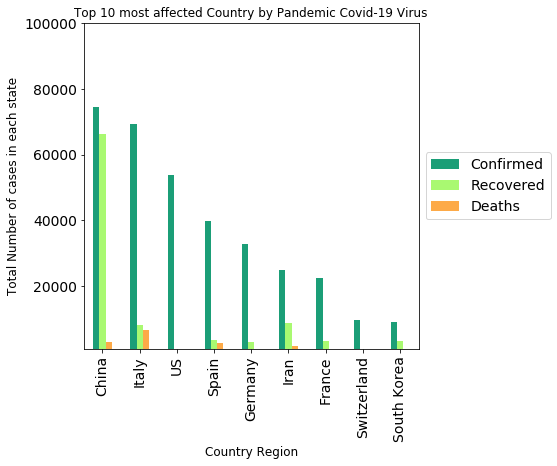

In [431]:
p1 = df_top_10.plot.bar(figsize=(6, 6), fontsize=14, color = ['#1b9e77', '#a9f971', '#fdaa48'])
# customize the axes and title
p1.set_ylim((1000,100000))
p1.set_ylabel("Total Number of cases in each state in the legend", fontsize=12)
p1.set_xlabel("Country Region", fontsize=12)
p1.set_title("Top 10 most affected Country by Pandemic Covid-19 Virus", fontsize=12);
p1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

# Analysis for the Covid 19 Data

As seen in the graph above, China, Italy, US, Spain, Germany, Iran, France, Switzerland, South Korea are the top 10 counrties affected due to Covid 19 virus and it is evident enough that it first started to spread in China state. The above data is from 1st of februray till 24th March 2020. As seen there are more than 700 thousand cases in china which makes it much worse when compared to other country. As this virus is spreading through air or human touch, that explains the sudden increase in the each country. Above graph also shows data for the Recovered cases of Covid 19. Apparently china again has the highest number which is a good thing, that means poeple are getting cured when taken care of. But in the case of USA, cases have not yet recovered and but there care no cases where people have died.   

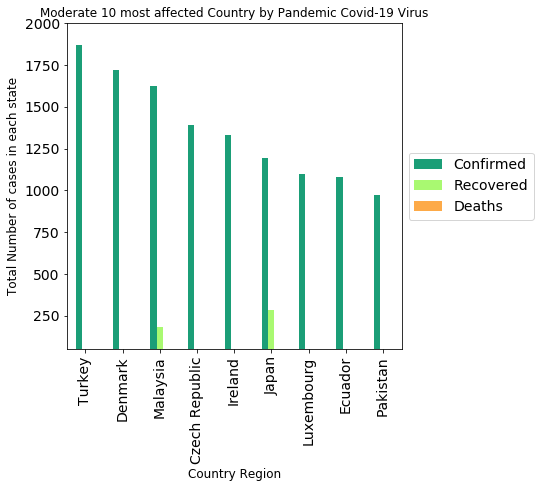

In [430]:
p2 = df_moderate_10.plot.bar(figsize=(6, 6), fontsize=14, color = ['#1b9e77', '#a9f971', '#fdaa48'])
# customize the axes and title
p2.set_ylim((50,2000))
p2.set_ylabel("Total Number of cases in each state in the legend", fontsize=12)
p2.set_xlabel("Country Region", fontsize=12)
p2.set_title("Moderate 10 most affected Country by Pandemic Covid-19 Virus", fontsize=12);
p2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

The second graph shows the countries which are moderately affected due to the covid 19 virus. The list includes Turkey, Denmark, Malaysia, Czech Republic, Ireland, Japan, Luxembourg, Ecuador and Pakistan. These countries have their confrimed cases in the range of 2000 to 1000 and turkey has the highest amount with cases around 1800. Apparently they are no cases where people have died during the span of 1st feb 2020 to 24th March 2020. 

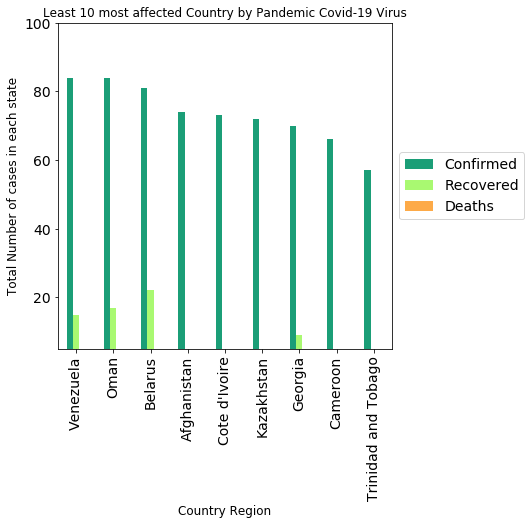

In [433]:
p3 = df_least_10.plot.bar(figsize=(6, 6), fontsize=14, color = ['#1b9e77', '#a9f971', '#fdaa48'])
# customize the axes and title
p3.set_ylim((5,100))
p3.set_ylabel("Total Number of cases in each state in the legend", fontsize=12)
p3.set_xlabel("Country Region", fontsize=12)
p3.set_title("Least 10 most affected Country by Pandemic Covid-19 Virus", fontsize=12);
p3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

The third graph shows the countries which are least affected due to the covid 19 virus. The list includes the countries shown in the graph. These countries have their confrimed cases in the range of 20 to 100 and Oman has the highest amount with cases around 90. The least count of confirmed cases are seen in Trinidad and Tobago country. Apparently they are no cases where people have died during the span of 1st feb 2020 to 24th March 2020. Also few countries have already started with their recovery.

In [437]:
#Creating a new Dataframe from the final dataframe to get the total number of cases for confirmed, Recovered and Deaths.
Counntry_fd = Final_Data.columns.values
Sum_Data = pd.DataFrame(columns=Counntry_fd)
Conf_Sum = Final_Data.T.loc["Confirmed"].sum()
Rec_Sum = Final_Data.T.loc["Recovered"].sum()
D_Sum = Final_Data.T.loc["Deaths"].sum()
Sum_Data = Sum_Data.append({'Confirmed': Conf_Sum}, ignore_index=True)
Sum_Data.iloc[0,1] = Rec_Sum
Sum_Data.iloc[0,2] = D_Sum

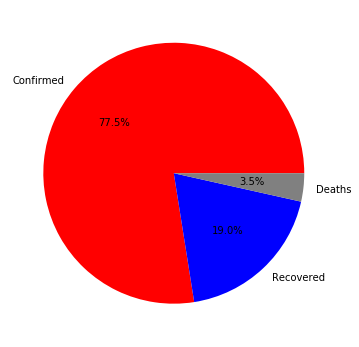

In [449]:
plt.figure(figsize=(6, 6))
# create the pie chart on the sample data
p5 = plt.pie(Sum_Data.iloc[0],labels=Final_Data.columns.values, colors=["red","blue","grey"], autopct="%.1f%%")

As seen in the above case, we have 77.5% of the total people affected in confirmed cases around the globe and not even half of them are cured. This means that the new virus doesnt have a vaccine to it yet and but surely not fatal as the deaths cases are where less when compared to the total.

In [501]:
Final_Data.loc['China'][0]
total = Sum_Data.iloc[0,0] + Sum_Data.iloc[0,1] + Sum_Data.iloc[0,2]
total

530193.0

In [459]:
Df1 = Dictionary_of_Data['Ireland']
Df2 = Dictionary_of_Data['US']
Df3 = Dictionary_of_Data['France']
Df4 = Dictionary_of_Data['Germany']


In [491]:
# Data = Df1.groupby(['lastUpdate']).sum()
# Data['Country'] = 'Ireland'
# Data_US = Df2.groupby(['lastUpdate']).sum()
# Data_US['Country'] = 'US'
# plt.plot(Data.index, Data['confirmed'])
# plt.plot(Data.index, Data['recovered'])
# plt.plot(Data.index, Data['deaths'])
# plt.plot(Data_US.index, Data_US['confirmed'])
# plt.plot(Data_US.index, Data_US['recovered'])
# plt.plot(Data_US.index, Data_US['deaths'])

,Confirmed,Recovered,Deaths
China,74533,66310,3216
Italy,69176,8326,6820
US,53740,348,706
Spain,39885,3794,2808
Germany,32986,3243,157
Iran,24811,8913,1934
France,22622,3288,1102
Switzerland,9877,131,122
South Korea,9037,3507,120
United Kingdom,8164,140,423


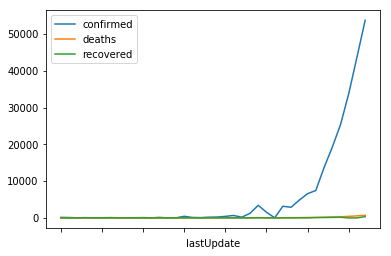

In [484]:
lines = Data_US.plot.line()